In [ ]:
# Instalando jupyter kernel
import sys
!{sys.executable} -m pip install networkx 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importando algunas librerías que utilizaremos

# Networkx para grafos
import networkx as nx

# Pandas
import pandas as pd #Leer archivos csv

# Mathplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0) #Tamaño de imagen

from pqdict import PQDict
from collections import defaultdict
import ast #Pasar str a Dict

In [ ]:
#Lectura y muestreo de datos del archivo csv
vuelos_eeuu = pd.read_csv('vuelos.csv')
vuelos_eeuu.head()


,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,FLY_DATE,LATITUDE,LONGITUDE
0,ANC,SEA,1448,1/10/2008,61.17432,-149.99619
1,LAX,PBI,2330,1/11/1990,33.94254,-118.40807
2,SFO,CLT,2296,1/12/1990,37.61900,-122.37484
3,LAX,MIA,2342,1/10/1990,33.94254,-118.40807
4,SEA,ANC,1448,1/02/1990,47.44898,-122.30931


In [ ]:
#Creación de Grafo para hallar el camino más corto
origen = {}
destino = {}
distancia = {}
i=0

for row in vuelos_eeuu.iterrows():
  origen[i]= row[1]["ORIGIN_AIRPORT"]
  destino[i]= row[1]["DESTINATION_AIRPORT"]
  distancia[i]= row[1]["DISTANCE"]
  i= i +1 

visitados=[]

Graph={}

for i in range(len(origen)):
  if origen[i] not in visitados:
    visitados.append(origen[i])
    a = "{"
    for j in range(len(origen)):
      if origen[i]==origen[j]:
        a = a + "'"+destino[j] + "' :" + str(distancia[j]) + ","
    a = a +"}" 
    Graph[origen[i]] = ast.literal_eval(a) 

#Creación del grafo para el muestreo en imagenes
DG=nx.DiGraph()
for row in vuelos_eeuu.iterrows():
  DG.add_edge(row[1]["ORIGIN_AIRPORT"],
              row[1]["DESTINATION_AIRPORT"],
              weight=row[1]["DISTANCE"]
              )
  

In [ ]:
#Implementación del algoritmo Dijkstra 
def dijkstra(G, start, end=None):
  print("Origen: "+start)
  print("Destino: "+ end)
  inf = float('inf')
  D = {start: 0}          # Asignación de nodos de su distancia desde el start
  Q = PQDict(D)           # Cola de prioridad para el seguimiento del camino más corto
  P = {}                  # Asignación de nodos a sus predecesores directos
  U = set(G.keys())       # Nodos inexplorados
  while U:                                    # Nodos por explorar
      (v, d) = Q.popitem()                    # Nodo con distancia minima d 
      D[v] = d                                # puntuación Greedy de Dijkstra
      U.remove(v)                             # Remover de inexplorados
      if v == end: break
      
      for w in G[v]:                        
          if w in U:                          
              d = D[v] + G[v][w]           
              if d < Q.get(w, inf):
                  Q[w] = d                    
                  P[w] = v
  print("DISTANCIA:",d)            
  return D, P


def shortest_path(G, start, end):
    dist, pred = dijkstra(G, start, end)
    v = end
    path = [v]
    while v != start:
        v = pred[v]
        path.append(v)        
    path.reverse()
    return path


In [ ]:
#Hallando Distancia mínima de dos nodos
print(shortest_path(Graph, "LAS", "FLL"))

Origen: LAS
Destino: FLL
DISTANCIA: 2174
['LAS', 'DFW', 'FLL']


In [ ]:
print(DG["LAS"]["DFW"])
print(DG["DFW"]["FLL"])

{'weight': 1055}
{'weight': 1119}


In [ ]:
#Muestreo del camino mínimo en un gráfo
def plot_shortest_path(path):
    print(path)
    positions = nx.random_layout(DG)
    
    nx.draw(DG, pos=positions,
                node_color='lightblue',
                edge_color='gray',
                font_size=10,
                width=1, with_labels=True, node_size=1500, alpha=0.8
           )
    
    short_path=nx.DiGraph()
    for i in range(len(path)-1):
        short_path.add_edge(path[i], path[i+1])
    
    nx.draw(short_path, pos=positions,
                node_color='dodgerblue',
                edge_color='dodgerblue',
                font_size=10,
                width=3, with_labels=True, node_size=1500
           )
    plt.show()
        
    

Origen: LAS
Destino: FLL
DISTANCIA: 2174
Camino más corto: 
['LAS', 'DFW', 'FLL']


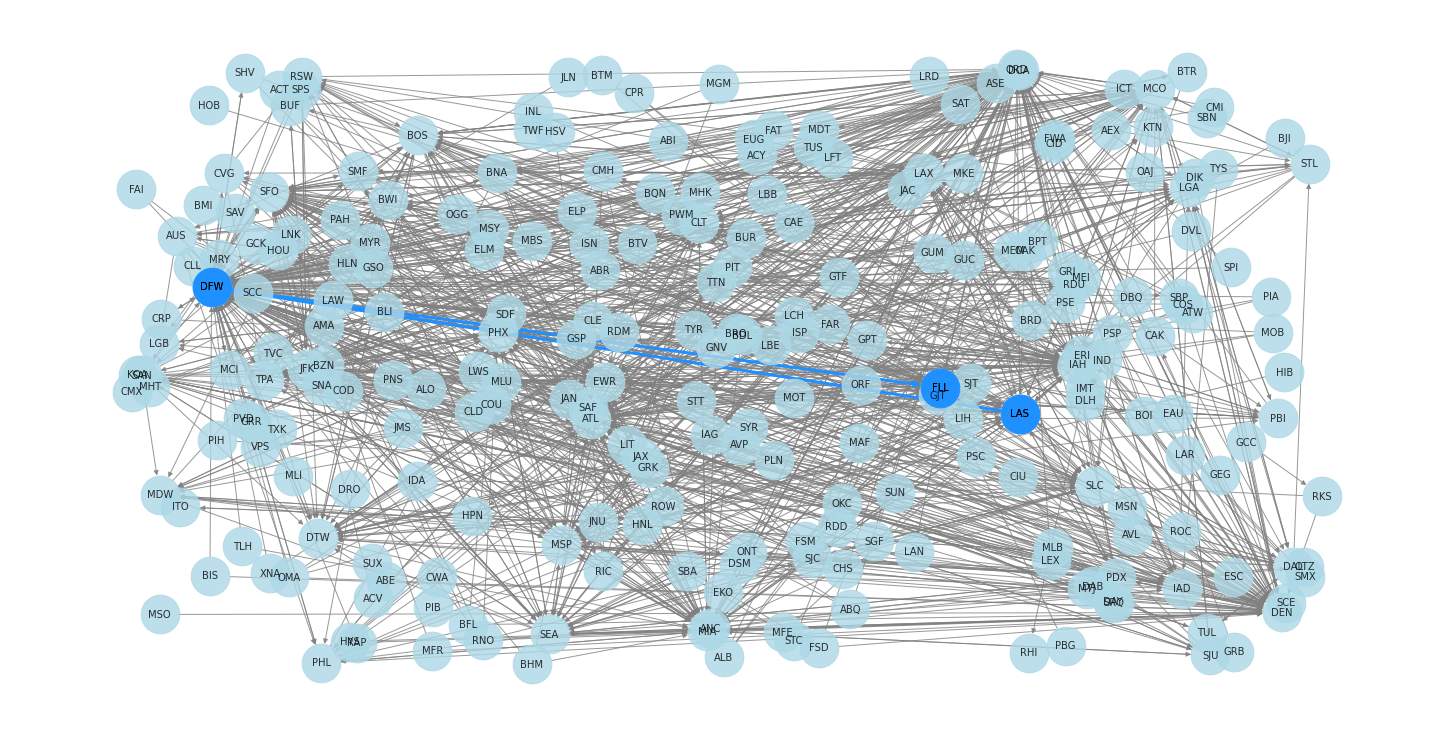

In [ ]:
#Muestreo en gráfico del camino más corto
camino=shortest_path(Graph, "LAS", "FLL")
print("Camino más corto: ")
plot_shortest_path(camino)

In [ ]:
#OBTENER IDS PARA EL RECORRIDO
camino=shortest_path(Graph, "LAS", "FLL")
arr= []
visit=[]
for i in range(len(origen)):
  if origen[i] not in visit:
    visit.append(origen[i])
    for y in range(len(camino)):
      if vuelos_eeuu.iloc[i]["ORIGIN_AIRPORT"]== camino[y]:
        arr.append(i)


path = vuelos_eeuu.iloc[arr]
print (arr)

Origen: LAS
Destino: FLL
DISTANCIA: 2174
[6, 70, 153]


In [1]:
plt.subplots(figsize=(10, 10))
plt.scatter(vuelos_eeuu['LONGITUDE'], vuelos_eeuu['LATITUDE'], s=1)
plt.plot(path['LONGITUDE'], path['LATITUDE'], 'r-')

NameError: ignored

In [ ]:
%%file vuelos1.csv
ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,FLY_DATE
ANC,SEA,1448,1/10/2008
LAX,PBI,2330,1/11/1990
SFO,CLT,2296,1/12/1990
LAX,MIA,2342,1/10/1990
SEA,ANC,1448,1/02/1990
SFO,MSP,1589,1/03/1990
LAS,MSP,1299,1/01/1990
LAX,CLT,2125,1/09/1990
SFO,DFW,1464,1/11/1990
LAS,ATL,1747,1/02/1990
DEN,ATL,1199,1/01/1990
LAS,MIA,2174,1/02/1990
LAX,MSP,1535,1/03/1990
SLC,ATL,1590,1/04/1990
SEA,MSP,1399,1/01/1990
ANC,SEA,1448,1/01/1990
ANC,SEA,1448,1/10/1990
SFO,IAH,1635,1/06/1990
ANC,PDX,1542,1/02/1990
PDX,MSP,1426,1/02/1990
LAS,MCI,1139,1/10/1990
SEA,MIA,2724,1/09/1990
LAS,DFW,1055,1/09/1990
LAX,MIA,2342,1/06/1990
LAS,MSP,1299,1/03/1990
LAX,IAH,1379,1/08/1990
FAI,SEA,1533,1/03/1990
MSP,FLL,1487,1/11/1990
LAS,CLT,1916,1/04/1990
DEN,MIA,1709,1/12/1990
PHX,ORD,1440,1/04/1990
PHX,MIA,1972,1/05/1990
ANC,SEA,1448,1/08/1990
SLC,ATL,1590,1/05/1990
LAS,IAH,1222,1/11/1990
LAS,HNL,2762,1/12/1990
ANC,PHX,2552,1/07/1990
SJU,EWR,1608,1/07/1990
ANC,SEA,1448,1/01/1990
SJU,JFK,1598,1/08/1990
PBG,FLL,1334,1/08/1990
PHX,DFW,868,1/04/1990
PHX,DFW,868,1/07/1990
ANC,PDX,1542,1/07/1990
IAG,FLL,1176,1/10/1990
SJU,EWR,1608,1/01/1990
PHX,CLT,1773,1/02/1990
ANC,SEA,1448,1/10/1990
PSE,MCO,1179,1/09/1990
BQN,EWR,1585,1/03/1990
BQN,MCO,1129,1/09/1990
SJU,BOS,1674,1/04/1990
SJU,MCO,1189,1/06/1990
BQN,MCO,1129,1/01/1990
PSE,MCO,1179,1/06/1990
SJU,BDL,1666,1/08/1990
ORD,PHX,1440,1/03/1990
GEG,SEA,224,1/05/1990
HNL,ITO,216,1/12/1990
ONT,SFO,363,1/11/1990
HNL,KOA,163,1/12/1990
ANC,SEA,1448,1/11/1990
HNL,OGG,100,1/11/1990
ORD,IAH,925,1/03/1990
MCO,MIA,192,1/04/1990
BOS,MYR,738,1/12/1990
HIB,MSP,174,1/02/1990
ABR,MSP,257,1/06/1990
MAF,IAH,429,1/07/1990
SEA,PHX,1107,1/02/1990
DFW,MIA,1121,1/05/1990
BOS,MIA,1258,1/10/1990
MKE,IAH,984,1/05/1990
PDX,PHX,1009,1/03/1990
IAH,MIA,964,1/01/1990
BNA,DTW,456,1/02/1990
BRO,IAH,308,1/01/1990
VPS,ATL,250,1/12/1991
BOI,SFO,522,1/12/1991
BJI,MSP,199,1/12/1991
HNL,LIH,102,1/02/1991
BNA,ATL,214,1/11/1991
SGF,DFW,364,1/09/1991
PHL,IAH,1325,1/05/1991
PDX,DEN,991,1/10/1991
SEA,DEN,1024,1/08/1991
DEN,DFW,641,1/06/1991
SBN,ORD,84,1/03/1991
PHL,MCO,861,1/04/1991
ORD,FLL,1182,1/01/1991
RDD,SFO,199,1/07/1991
EUG,DEN,996,1/08/1991
SFO,DEN,967,1/05/1991
ORD,DEN,888,1/05/1991
IAD,IAH,1190,1/03/1991
BUF,JFK,301,1/08/1991
PWM,JFK,273,1/06/1991
JFK,SJU,1598,1/03/1991
CRP,IAH,201,1/06/1991
PIA,DTW,346,1/07/1991
ORD,DTW,235,1/10/1991
FAT,LAX,209,1/10/1991
SMF,DEN,909,1/11/1991
AUS,LAX,1242,1/06/1991
BOS,BWI,369,1/03/1991
ORD,BOS,867,1/02/1991
PHX,DTW,1671,1/02/1991
MCI,ATL,692,1/09/1991
BOS,DTW,632,1/09/1991
ATL,IAD,534,1/01/1991
JAX,EWR,820,1/10/1991
MFR,DEN,964,1/11/1991
SLC,IAH,1195,1/12/1991
IDA,DEN,458,1/12/1991
MSN,DEN,826,1/01/1991
MKE,DTW,237,1/11/1991
GEG,DEN,836,1/07/1991
SEA,IAH,1874,1/04/1991
DCA,IAH,1208,1/01/1991
SAT,DFW,247,1/08/1991
JFK,MIA,1089,1/08/1991
BOS,PBI,1197,1/07/1991
BOS,JFK,187,1/09/1991
JFK,BQN,1576,1/04/1991
DFW,ATL,731,1/12/1991
CHS,EWR,628,1/04/1991
MKE,DEN,896,1/05/1991
MSP,DEN,680,1/02/1991
CHS,DFW,987,1/01/1991
DEN,LAX,862,1/01/1991
SBA,DEN,916,1/01/1991
SMX,LAX,134,1/07/1991
HNL,KOA,163,1/02/1991
BOS,BUF,395,1/02/1991
PDX,EWR,2434,1/01/1991
IND,PHX,1488,1/11/1991
LAX,DEN,862,1/12/1991
CLE,IAH,1091,1/10/1991
BOS,EWR,200,1/10/1991
DEN,PHX,602,1/12/1991
MCI,PHX,1044,1/12/1991
AUS,DFW,190,1/12/1991
LAX,DFW,1235,1/07/1991
GSP,ATL,153,1/09/1991
MCO,EWR,937,1/09/1991
MCI,IAH,643,1/07/1991
BDL,IAD,326,1/09/1991
ABI,DFW,158,1/01/1991
RIC,IAH,1157,1/07/1991
BFL,DEN,845,1/11/1991
SAT,SFO,1482,1/01/1991
OMA,IAH,781,1/11/1991
RDM,DEN,898,1/06/1991
FLL,BDL,1173,1/06/1991
CID,ATL,694,1/06/1991
SFO,DEN,967,1/05/1991
MCO,LAX,2218,1/04/1991
TPA,EWR,997,1/03/1991
SEA,DFW,1660,1/06/1991
BOS,DFW,1562,1/03/1991
SYR,JFK,209,1/03/1991
ROC,JFK,264,1/05/1991
TYR,DFW,102,1/08/1991
MCI,ORD,403,1/05/1991
LAN,ORD,179,1/04/1991
BUF,EWR,282,1/08/1991
XNA,DFW,280,1/01/1991
GSO,EWR,445,1/04/1991
ORD,LGA,733,1/02/1991
LAX,IAH,1379,1/11/1991
EWR,MIA,1085,1/02/1991
ONT,DEN,819,1/02/1991
MSP,DEN,680,1/01/1991
PBI,IAH,956,1/03/1991
PHX,IAH,1009,1/05/1991
RSW,IAH,861,1/08/1991
EWR,MCO,937,1/10/1991
OMA,ORD,416,1/10/1991
SMF,PHX,647,1/09/1992
OAK,PHX,646,1/09/1992
PVD,CLT,683,1/06/1992
RNO,DEN,804,1/06/1992
PIT,IAH,1117,1/03/1992
DEN,IAH,862,1/03/1992
BOS,BWI,369,1/06/1992
LAS,BWI,2106,1/08/1992
ABQ,HOU,759,1/10/1992
PHX,SLC,507,1/10/1992
PIT,FLL,994,1/12/1992
PVD,BWI,327,1/08/1992
SFO,ATL,2139,1/03/1992
SFO,ORD,1846,1/02/1992
MCO,EWR,937,1/12/1992
PDX,IAH,1825,1/12/1992
BOS,ORD,867,1/04/1992
SFO,LAX,337,1/02/1992
SAT,LAX,1211,1/02/1992
BOS,LAX,2611,1/05/1992
SEA,EWR,2402,1/04/1992
LAX,ORD,1744,1/11/1992
IAH,PHX,1009,1/11/1992
MCO,PHX,1849,1/08/1992
SFO,PHX,651,1/10/1992
DFW,MCO,985,1/11/1992
MIA,PHL,1013,1/07/1992
SLC,DFW,989,1/07/1992
DCA,DFW,1192,1/07/1992
MIA,DFW,1121,1/05/1992
BWI,MIA,946,1/04/1992
DFW,LGA,1389,1/05/1992
LGA,DFW,1389,1/01/1992
DEN,ORD,888,1/01/1992
MCI,DFW,460,1/01/1992
MCO,DFW,985,1/06/1992
SFO,DFW,1464,1/09/1992
TUL,DFW,237,1/03/1992
LGA,MIA,1096,1/11/1992
LIT,DFW,304,1/01/1992
MIA,LGA,1096,1/12/1992
LAS,DFW,1055,1/11/1992
PDX,DFW,1616,1/03/1992
TPA,DFW,929,1/02/1992
SMF,DFW,1431,1/01/1992
MSY,MIA,675,1/04/1992
LAX,ORD,1744,1/08/1992
OMA,DFW,583,1/02/1992
OKC,DFW,175,1/11/1992
SEA,ANC,1448,1/01/1992
FAI,ANC,261,1/05/1992
SEA,SJC,697,1/03/1992
SEA,OAK,671,1/09/1992
PDX,SJC,569,1/02/1992
LAX,SEA,954,1/01/1992
PHX,SEA,1107,1/11/1992
DEN,SEA,1024,1/01/1992
GEG,SEA,224,1/06/1992
RSW,JFK,1074,1/02/1992
PBI,JFK,1028,1/03/1992
JFK,PBI,1028,1/09/1992
TPA,JFK,1005,1/10/1992
FLL,LGA,1076,1/05/1992
OAK,LGB,353,1/06/1992
LGA,FLL,1076,1/07/1992
JFK,MCO,944,1/12/1992
EWR,FLL,1065,1/07/1992
JFK,TPA,1005,1/03/1992
PSE,JFK,1617,1/04/1992
MSY,JFK,1182,1/04/1992
AUS,JFK,1521,1/10/1992
BQN,JFK,1576,1/04/1992
TPA,BOS,1185,1/08/1992
JAX,JFK,828,1/02/1993
DCA,BOS,399,1/04/1993
JFK,ATL,760,1/03/1993
LGA,DTW,502,1/11/1993
RNO,SLC,422,1/01/1993
BOS,JFK,187,1/05/1993
BOS,MSP,1124,1/09/1993
LGA,ATL,762,1/12/1993
ORD,ATL,606,1/06/1993
ANC,MSP,2519,1/12/1993
ATW,ATL,765,1/03/1993
PHX,ATL,1587,1/09/1993
PNS,ATL,271,1/01/1993
MCO,SLC,1931,1/10/1993
ONT,DFW,1188,1/05/1993
DCA,MIA,919,1/04/1993
RIC,ATL,481,1/01/1993
LAX,ATL,1947,1/05/1993
BOS,ATL,946,1/05/1993
LAS,DTW,1749,1/04/1993
OKC,ATL,761,1/08/1993
MCO,MSP,1310,1/12/1993
MEM,ATL,332,1/11/1993
TUL,ATL,674,1/06/1993
BWI,DTW,409,1/11/1993
BOS,PHL,280,1/07/1993
MCO,LGA,950,1/06/1993
FLL,JFK,1069,1/06/1993
SJU,JFK,1598,1/04/1993
BOS,DCA,399,1/07/1993
TYS,DFW,772,1/02/1993
MHT,ORD,843,1/02/1993
SAV,EWR,708,1/03/1993
MEM,EWR,946,1/02/1993
CLT,ORD,599,1/08/1993
TYS,IAD,419,1/09/1993
GRB,ORD,173,1/10/1993
ABE,DTW,425,1/03/1993
JAN,ATL,341,1/12/1993
OAJ,ATL,399,1/01/1993
FAR,ORD,557,1/03/1993
JAN,ORD,677,1/02/1993
ERI,ORD,398,1/04/1993
ATW,ORD,160,1/01/1993
LEX,ORD,323,1/01/1993
CWA,ORD,212,1/02/1993
MSO,DEN,679,1/11/1993
ORD,MIA,1197,1/03/1993
CLE,FLL,1062,1/11/1993
IAH,SFO,1635,1/12/1993
SEA,DEN,1024,1/09/1993
SFO,IAH,1635,1/01/1994
TTN,ATL,701,1/12/1994
ATL,TTN,701,1/10/1994
HNL,ITO,216,1/06/1994
MAF,DFW,309,1/09/1994
AMA,DFW,312,1/01/1994
CLL,DFW,164,1/05/1994
HOU,DFW,247,1/04/1994
DFW,BTR,383,1/06/1994
JLN,DFW,327,1/08/1994
CID,DFW,685,1/01/1994
MLI,DFW,691,1/11/1994
GSP,DFW,862,1/11/1994
RDU,JFK,427,1/12/1994
CVG,MIA,948,1/02/1994
MHK,DFW,431,1/11/1994
MOB,DFW,539,1/10/1994
TLH,DFW,767,1/07/1994
PNS,MIA,530,1/03/1994
BHM,MIA,661,1/01/1994
CVG,DFW,812,1/10/1994
CAE,DFW,922,1/08/1994
TXK,DFW,181,1/04/1994
OAK,LAS,407,1/02/1994
DFW,OAK,1457,1/11/1994
ACY,RSW,982,1/02/1994
DTW,LGA,502,1/06/1994
DFW,FLL,1119,1/06/1994
SMF,LAX,373,1/04/1994
RAP,DEN,300,1/07/1994
TUS,SFO,751,1/10/1994
EAU,ORD,268,1/06/1994
DLH,ORD,397,1/05/1994
FSD,ORD,462,1/05/1994
AUS,SFO,1504,1/05/1994
FAT,SEA,748,1/01/1994
ONT,PDX,838,1/01/1994
INL,BRD,153,1/11/1994
CMX,ORD,359,1/03/1994
SMF,SFO,86,1/03/1994
BOI,LAX,674,1/12/1994
SPI,ORD,174,1/12/1994
CLD,LAX,86,1/04/1994
COD,DEN,391,1/03/1994
FAT,SFO,158,1/09/1994
CMH,MIA,990,1/08/1994
LRD,DFW,396,1/09/1994
PSC,DEN,852,1/09/1994
CPR,DEN,230,1/08/1994
ACV,SFO,250,1/07/1994
DAL,IAH,216,1/08/1994
PAH,ORD,342,1/11/1994
PSC,SFO,620,1/07/1994
CID,ORD,196,1/10/1994
EUG,SFO,451,1/10/1994
DFW,DEN,641,1/02/1994
MRY,SFO,77,1/09/1995
SLC,LAX,590,1/11/1995
ESC,DTW,306,1/11/1995
MFR,SFO,329,1/09/1995
FAT,DEN,844,1/10/1995
SFO,EWR,2565,1/10/1995
LAS,IAH,1222,1/08/1995
EWR,SFO,2565,1/08/1995
ISN,DEN,576,1/08/1995
HNL,LIH,102,1/08/1995
PSP,SFO,421,1/08/1995
PSP,DEN,776,1/08/1995
SAT,IAH,191,1/05/1995
LAX,EWR,2454,1/09/1995
LAX,SFO,337,1/06/1995
CLE,IAD,288,1/07/1995
CAE,IAD,401,1/02/1995
PHX,DEN,602,1/02/1995
SMF,IAH,1609,1/02/1995
JFK,SFO,2586,1/03/1995
BOS,PHX,2300,1/03/1995
BOS,CLT,728,1/03/1995
DTW,MIA,1145,1/01/1995
FLL,EWR,1065,1/01/1995
GEG,DEN,836,1/04/1995
SAT,STL,786,1/06/1995
ONT,DEN,819,1/06/1995
CLE,EWR,404,1/06/1995
DFW,PHX,868,1/04/1995
MFE,DFW,469,1/04/1995
STL,DFW,550,1/12/1995
SJU,MIA,1045,1/12/1995
MKE,DFW,853,1/12/1995
SEA,SFO,679,1/05/1995
SEA,LAS,867,1/07/1995
BTV,JFK,266,1/07/1995
JFK,FLL,1069,1/05/1995
SFO,LGB,354,1/05/1995
PBI,BOS,1197,1/11/1995
MCO,JFK,944,1/09/1995
SJU,MCO,1189,1/10/1995
BDL,ATL,859,1/06/1995
RDU,ATL,356,1/10/1995
SFO,SLC,599,1/03/1995
TUS,IAH,936,1/12/1995
PIA,ATL,565,1/02/1995
IND,DEN,977,1/04/1995
MCI,DEN,533,1/06/1995
DFW,DEN,641,1/01/1995
FSM,DFW,227,1/01/1995
AEX,DFW,285,1/04/1995
SPS,DFW,113,1/03/1995
ACT,DFW,89,1/03/1995
SJT,DFW,229,1/03/1995
JAN,DFW,408,1/02/1995
HNL,OGG,100,1/05/1995
OKC,LAX,1187,1/02/1995
FAR,DEN,627,1/03/1995
SFO,IAH,1635,1/03/1995
EWR,FLL,1065,1/01/1995
MTJ,DEN,196,1/01/1996
RSW,DTW,1084,1/11/1996
GCC,RKS,261,1/06/1996
MSY,EWR,1167,1/04/1996
ORD,MCO,1005,1/05/1996
RIC,ORD,642,1/10/1996
RDM,SFO,462,1/11/1996
OGG,HNL,100,1/07/1996
SJC,SLC,584,1/11/1996
ORD,MBS,222,1/11/1996
EWR,CLT,529,1/03/1996
PHX,BWI,1999,1/12/1996
SEA,IAD,2306,1/11/1996
LAS,SFO,414,1/10/1996
DFW,MIA,1121,1/10/1996
BNA,DFW,631,1/02/1996
PHX,DFW,868,1/10/1996
BOS,MIA,1258,1/01/1996
LAX,STL,1592,1/02/1996
OAK,SEA,671,1/03/1996
SEA,LAX,954,1/01/1996
BOS,IAD,413,1/01/1996
LAX,JFK,2475,1/07/1996
DCA,FLL,899,1/07/1996
DTW,BOS,632,1/03/1996
BNA,LAX,1797,1/06/1996
PHL,ATL,666,1/06/1996
PHX,MSP,1276,1/09/1996
SJU,FLL,1046,1/09/1996
VPS,IAH,528,1/09/1996
GUC,DEN,152,1/06/1996
MIA,LGA,1096,1/04/1996
RIC,MIA,825,1/04/1996
DTW,LGA,502,1/08/1996
ORF,MIA,802,1/05/1996
MOT,DEN,604,1/05/1996
STL,MIA,1068,1/04/1996
BOS,FLL,1237,1/08/1996
MLU,IAH,262,1/08/1996
MAF,DEN,563,1/05/1996
LAX,LAS,236,1/12/1996
PDX,ORD,1739,1/12/1996
JFK,SJU,1598,1/09/1996
KOA,HNL,163,1/06/1996
EUG,SLC,618,1/09/1996
RNO,PHX,601,1/08/1996
PHX,CLT,1773,1/11/1996
CMH,ATL,447,1/06/1996
HOU,ATL,696,1/12/1996
HOU,PHX,1020,1/08/1996
DTW,DFW,986,1/10/1996
BOS,JFK,187,1/02/1996
DFW,DCA,1192,1/12/1996
MSP,DFW,852,1/03/1996
SEA,SNA,978,1/11/1996
BDL,DCA,313,1/07/1996
SJU,BOS,1674,1/11/1996
FLL,EWR,1065,1/05/1996
MOB,ATL,302,1/06/1996
SAN,SLC,626,1/01/1996
LAS,SLC,368,1/04/1996
DCA,DTW,405,1/12/1996
SMF,SLC,532,1/07/1996
DEN,DTW,1123,1/12/1996
SFO,ATL,2139,1/01/1996
LGA,MSP,1020,1/09/1997
LAW,DFW,140,1/07/1997
BRO,DFW,482,1/07/1997
PIB,MEI,69,1/06/1997
CHS,IAH,925,1/10/1997
MEM,IAH,468,1/10/1997
MGM,ATL,147,1/06/1997
SLC,DEN,391,1/11/1997
OMA,DEN,472,1/05/1997
FAR,DFW,968,1/05/1997
DCA,JFK,213,1/08/1997
MSN,DFW,821,1/10/1997
CMH,LGA,479,1/03/1997
SBP,LAX,156,1/03/1997
COS,IAH,809,1/03/1997
OAK,SLC,588,1/07/1997
LAR,DEN,113,1/05/1997
SAN,LAX,109,1/04/1997
BFL,SFO,238,1/04/1997
DRO,PHX,351,1/02/1997
MRY,PHX,598,1/02/1997
FAT,PHX,493,1/12/1997
MSP,ORD,334,1/09/1997
DFW,ORD,802,1/11/1997
BIS,DEN,516,1/01/1997
ITO,HNL,216,1/01/1997
PBI,LGA,1035,1/01/1997
SAT,ORD,1041,1/08/1997
FLL,IAH,965,1/08/1997
BUF,CLT,546,1/06/1997
SEA,ORD,1721,1/09/1997
CMH,FLL,973,1/04/1997
LAS,HOU,1235,1/03/1997
PVD,MCO,1072,1/10/1997
SAN,BWI,2295,1/12/1997
SAN,MDW,1728,1/10/1997
SMF,PHX,647,1/10/1997
SAN,DEN,853,1/01/1997
SAN,EWR,2425,1/02/1997
SJC,PHX,621,1/01/1997
SJC,DFW,1438,1/04/1997
DFW,BOS,1562,1/03/1997
SAN,DFW,1171,1/05/1997
LAX,DFW,1235,1/03/1997
ONT,SEA,956,1/05/1997
RDU,MIA,700,1/03/1997
ROC,ATL,749,1/03/1997
MCO,ATL,404,1/05/1997
DCA,MSP,931,1/05/1997
CAE,IAH,878,1/01/1997
BTR,ATL,448,1/04/1997
IAD,MSP,908,1/01/1997
SAV,DFW,925,1/09/1997
GRI,DFW,561,1/01/1997
PDX,SAN,933,1/07/1997
DFW,MSP,852,1/10/1997
PSP,SLC,541,1/08/1997
ISN,MSP,546,1/08/1997
HLN,DEN,594,1/04/1997
MCO,IAH,854,1/09/1997
BOS,RIC,474,1/07/1997
BZN,DEN,524,1/07/1997
FAT,SLC,501,1/04/1997
FSD,DEN,483,1/09/1997
IAH,ORD,925,1/02/1997
EWR,IAH,1400,1/08/1997
PIT,DTW,201,1/06/1997
FLL,CLT,631,1/06/1997
MIA,EWR,1085,1/06/1997
DEN,ATL,1199,1/02/1997
MDW,PHX,1444,1/01/1997
LAX,PHL,2402,1/06/1997
IAD,DFW,1172,1/02/1997
LAX,AUS,1242,1/10/1997
CLT,DFW,936,1/10/1997
PHL,DFW,1303,1/11/1997
DFW,CLT,936,1/11/1997
ATL,DFW,731,1/12/1997
RDU,DFW,1061,1/04/1997
SAT,DFW,247,1/05/1997
FAI,SEA,1533,1/07/1997
FLL,BOS,1237,1/10/1997
RSW,BOS,1249,1/03/1997
MIA,ATL,594,1/09/1997
BWI,MSP,936,1/09/1997
MDT,ATL,620,1/10/1998
EWR,BOS,200,1/08/1998
SCE,DTW,301,1/07/1998
GEG,DEN,836,1/02/1998
LEX,DFW,785,1/11/1998
VPS,DFW,641,1/08/1998
BWI,ORD,622,1/06/1998
SBA,PHX,455,1/12/1998
SBP,PHX,509,1/03/1998
PNS,IAH,489,1/07/1998
COS,DEN,73,1/01/1998
CLE,ORD,315,1/09/1998
LIH,HNL,102,1/04/1998
TWF,SLC,175,1/12/1998
SAN,ATL,1892,1/06/1998
BDL,ORD,783,1/05/1998
LAX,PHX,370,1/05/1998
EWR,PHX,2133,1/11/1998
PHL,CLT,449,1/12/1998
AUS,IAH,140,1/03/1998
SFO,EWR,2565,1/04/1998
RNO,SFO,192,1/10/1998
SEA,MDW,1733,1/07/1998
SJU,TPA,1237,1/01/1998
HNL,LAX,2556,1/11/1998
CLT,PHL,449,1/06/1998
JFK,PHX,2153,1/10/1998
SAN,PHX,304,1/05/1998
ONT,PHX,325,1/03/1998
MIA,CLT,650,1/12/1998
PBI,ORD,1144,1/09/1998
EWR,DFW,1372,1/08/1998
ANC,OTZ,548,1/02/1998
SAN,SEA,1050,1/02/1998
SAN,PDX,933,1/01/1999
JFK,LAX,2475,1/08/1999
LGA,MCO,950,1/12/1999
JFK,RSW,1074,1/06/1999
BOS,PIT,496,1/09/1999
SFO,JFK,2586,1/05/1999
MSP,ATL,907,1/10/1999
AUS,ATL,813,1/02/1999
COS,ATL,1184,1/04/1999
DTW,ATL,594,1/03/1999
MSY,LGA,1183,1/11/1999
SEA,ATL,2182,1/07/1999
EWR,ATL,746,1/01/1999
TPA,ATL,406,1/07/1999
BPT,DFW,270,1/12/1999
RIC,IAD,100,1/02/1999
EWR,JAX,820,1/01/1999
GPT,IAH,376,1/04/1999
TPA,DEN,1506,1/08/1999
RSW,DEN,1607,1/01/1999
DEN,DFW,641,1/12/1999
CLE,MCO,895,1/03/1999
GPT,DFW,500,1/09/1999
MGM,DFW,622,1/06/1999
SAN,LAX,109,1/02/1999
ACY,MYR,466,1/04/1999
STC,ORD,394,1/11/1999
BOI,LAX,674,1/01/1999
SFO,SAN,447,1/01/1999
MSP,LAX,1535,1/05/1999
BFL,PHX,425,1/07/1999
TPA,ORD,1012,1/10/1999
ORD,IAD,589,1/11/1999
HNL,OGG,100,1/02/1999
JFK,MSY,1182,1/01/2000
MKE,ORD,67,1/12/2000
MIA,ORD,1197,1/09/2000
SEA,PHL,2378,1/06/2000
SAT,ATL,874,1/10/2000
PDX,MDW,1751,1/11/2000
LAS,PHX,255,1/03/2000
JAX,DFW,918,1/02/2000
MSY,DFW,447,1/04/2000
PIT,DFW,1067,1/07/2000
COS,DFW,592,1/05/2000
SEA,SAN,1050,1/08/2000
PDX,SAN,933,1/11/2000
SEA,SLC,689,1/05/2000
PVD,MCO,1072,1/01/2000
HPN,PBI,1056,1/02/2000
JFK,LAS,2248,1/07/2000
MLB,ATL,442,1/12/2000
PIT,ATL,526,1/09/2000
SAN,MSP,1532,1/06/2000
ABE,ATL,692,1/08/2000
SPI,DFW,630,1/10/2000
PLN,DTW,243,1/03/2000
PDX,ONT,838,1/04/2000
RSW,EWR,1068,1/05/2001
SJC,MSP,1576,1/07/2001
CIU,DTW,284,1/03/2001
MCO,CLT,468,1/06/2001
BWI,CLT,361,1/11/2001
EWR,CLT,529,1/01/2001
AUS,ATL,813,1/04/2001
CAK,MCO,861,1/03/2001
FLL,LAS,2173,1/09/2001
MKE,LAS,1524,1/09/2001
PHX,MDW,1444,1/12/2001
SJC,LAS,386,1/08/2001
LAS,EWR,2227,1/10/2001
ORD,EWR,719,1/02/2001
DSM,DFW,624,1/06/2001
IAH,DFW,224,1/04/2001
RIC,DFW,1158,1/09/2001
BLI,SEA,93,1/03/2001
PDX,LAX,834,1/12/2001
SEA,PSP,987,1/08/2001
LAX,PDX,834,1/10/2001
SEA,DFW,1660,1/07/2001
SLC,SJC,584,1/04/2001
BDL,MIA,1194,1/05/2001
RSW,ATL,515,1/01/2001
TPA,LGA,1010,1/11/2001
MCO,LGA,950,1/02/2001
SFO,MSP,1589,1/08/2001
CRP,DFW,354,1/11/2001
SHV,DFW,190,1/11/2002
BTR,DFW,383,1/10/2002
MLU,DFW,293,1/12/2002
PIA,DFW,672,1/05/2002
ROW,DFW,435,1/10/2002
FWA,DFW,859,1/12/2002
CHS,MIA,489,1/11/2002
GSO,MIA,710,1/06/2002
LGA,FLL,1076,1/03/2002
DTW,ATL,594,1/10/2002
DTW,FLL,1127,1/10/2002
PDX,BUR,817,1/11/2002
MSN,ORD,108,1/11/2002
COS,LAX,833,1/07/2002
GCC,DEN,313,1/06/2002
LAX,IAH,1379,1/02/2002
SNA,IAH,1346,1/11/2002
BUF,ORD,473,1/08/2002
SFO,LAX,337,1/04/2002
DAL,MDW,793,1/12/2002
LIT,DAL,296,1/10/2002
MHT,MCO,1142,1/12/2002
ALB,MCO,1073,1/09/2002
SAT,BWI,1407,1/01/2002
OKC,ATL,761,1/12/2002
SNA,PHX,338,1/11/2002
DFW,STL,550,1/11/2002
LGA,DFW,1389,1/11/2002
LAS,ORD,1514,1/05/2002
BNA,MIA,806,1/09/2002
MSP,MIA,1501,1/01/2002
SNA,DFW,1205,1/04/2002
MIA,DCA,919,1/02/2002
JFK,BOS,187,1/11/2002
BOS,DTW,632,1/11/2002
OMA,ATL,821,1/03/2002
PIT,MSP,726,1/07/2002
SNA,ATL,1919,1/08/2002
FLL,ATL,581,1/12/2002
SNA,MSP,1522,1/06/2002
ATL,LGA,762,1/10/2002
BHM,ATL,134,1/02/2003
BNA,ATL,214,1/03/2003
FLL,DFW,1119,1/08/2003
SAN,JFK,2446,1/04/2003
BHM,DFW,597,1/08/2003
HOB,IAH,501,1/02/2003
LNK,DEN,423,1/07/2003
DEN,MSP,680,1/01/2003
LAS,DEN,628,1/10/2003
SNA,DEN,846,1/11/2003
SGF,DFW,364,1/09/2003
CMI,DFW,693,1/10/2003
COU,DFW,489,1/06/2003
BWI,FLL,925,1/05/2003
MCI,IAH,643,1/12/2003
GTF,DEN,624,1/05/2003
BNA,CVG,230,1/04/2003
SNA,SFO,372,1/04/2003
PHX,LAX,370,1/04/2003
ATL,IAH,689,1/04/2003
EKO,SLC,200,1/12/2003
IAD,JFK,228,1/01/2003
HNL,KOA,163,1/03/2003
FAT,SFO,158,1/02/2003
LAX,MSP,1535,1/05/2003
PHX,SFO,651,1/09/2003
PIT,CLT,366,1/11/2003
MSP,CLT,930,1/07/2003
BWI,MCO,787,1/10/2003
MSY,ATL,425,1/08/2003
PHX,DAL,879,1/02/2003
FLL,ORD,1182,1/04/2003
PHL,PHX,2075,1/06/2003
LAX,SFO,337,1/08/2003
MEM,DFW,432,1/11/2003
BOS,DFW,1562,1/04/2003
AUS,DFW,190,1/09/2003
DFW,TPA,929,1/10/2003
CLE,DFW,1021,1/02/2003
LAX,DFW,1235,1/08/2003
SJC,SEA,697,1/01/2003
PDX,SNA,859,1/08/2003
LAS,PDX,763,1/10/2003
SEA,SMF,605,1/04/2003
LGB,OAK,353,1/11/2003
LAX,JFK,2475,1/10/2003
AVL,ATL,164,1/07/2003
HSV,ATL,151,1/01/2003
BNA,ORD,409,1/06/2003
SAF,DFW,551,1/09/2003
GRR,DFW,931,1/08/2003
XNA,ORD,522,1/02/2003
SUX,ORD,436,1/12/2003
LFT,DFW,351,1/09/2003
ORD,TPA,1012,1/12/2003
PSP,IAH,1269,1/12/2003
HYS,DEN,298,1/12/2003
BOS,EWR,200,1/03/2003
HNL,ITO,216,1/02/2003
JFK,MIA,1089,1/01/2003
DTW,LAS,1749,1/01/2003
EWR,MIA,1085,1/11/2003
SAN,IAH,1303,1/05/2003
DFW,IAH,224,1/06/2003
RIC,CLT,257,1/04/2003
TPA,CLT,507,1/03/2003
TPA,EWR,997,1/06/2003
CAK,ATL,528,1/03/2003
MCO,ATL,404,1/11/2003
ABQ,DAL,580,1/08/2003
PVD,FLL,1188,1/09/2003
PHL,FLL,992,1/10/2003
PHL,LAS,2176,1/02/2003
MIA,DEN,1709,1/12/2003
TUL,DFW,237,1/07/2003
LAX,BOS,2611,1/05/2003
DFW,LGA,1389,1/10/2003
BWI,DFW,1217,1/08/2003
DFW,LAX,1235,1/12/2003
SFO,JFK,2586,1/04/2003
MKE,MSP,297,1/07/2003
PDX,MSP,1426,1/07/2003
MCO,DCA,759,1/05/2003
JFK,BUF,301,1/03/2003
MSP,LAS,1299,1/05/2003
ATL,MCO,404,1/06/2003
MFE,IAH,316,1/08/2003
TTN,RDU,373,1/05/2003
ELP,ORD,1236,1/06/2003
HSV,ORD,510,1/08/2003
ABQ,ORD,1118,1/02/2003
RDU,SFO,2400,1/10/2003
EWR,LAX,2454,1/04/2003
DCA,CLT,331,1/03/2003
MCO,EWR,937,1/01/2003
DCA,MIA,919,1/07/2004
JFK,SFO,2586,1/02/2004
JFK,PBI,1028,1/05/2004
LGA,ATL,762,1/11/2004
PSP,PHX,261,1/03/2004
DVL,JMS,83,1/07/2004
ALB,ORD,723,1/04/2004
PDX,SFO,550,1/05/2004
EWR,TPA,997,1/09/2004
JAX,CLT,328,1/11/2004
CLE,CLT,430,1/01/2004
CLT,MIA,650,1/10/2004
IAH,CLT,912,1/08/2004
IND,CLT,427,1/02/2004
DFW,CLT,936,1/09/2004
LGA,ORD,733,1/08/2004
BOS,IAH,1597,1/12/2004
BOS,ORD,867,1/11/2004
SFO,EWR,2565,1/06/2004
SNA,DEN,846,1/07/2004
SFO,IAH,1635,1/10/2004
JFK,LAX,2475,1/09/2004
LAS,SFO,414,1/06/2004
BUF,FLL,1165,1/12/2004
BWI,HOU,1246,1/11/2004
BWI,LAS,2106,1/08/2004
CLE,PHX,1737,1/01/2004
DCA,DAL,1184,1/04/2004
ISP,FLL,1092,1/03/2004
MDW,DAL,793,1/01/2004
MDW,TPA,997,1/02/2004
MSP,MDW,349,1/10/2004
PIT,MCO,834,1/07/2004
SAT,BNA,822,1/09/2004
HOU,MCO,849,1/05/2004
MCO,SFO,2446,1/06/2004
EWR,DEN,1605,1/02/2004
ORD,PHX,1440,1/08/2004
ATL,CLT,226,1/06/2004
SLC,PHX,507,1/10/2004
BOI,PHX,735,1/10/2004
DCA,PHX,1979,1/11/2004
JFK,LAX,2475,1/08/2004
ATL,MIA,594,1/09/2004
LAX,JFK,2475,1/03/2004
SFO,MIA,2585,1/07/2004
BOS,LAX,2611,1/07/2004
MIA,LAS,2174,1/08/2004
DFW,BNA,631,1/02/2004
LGA,ORD,733,1/07/2004
FAT,DFW,1313,1/12/2004
BOS,ORD,867,1/11/2004
LAS,DFW,1055,1/08/2004
MIA,IAH,964,1/12/2004
DFW,MCO,985,1/12/2004
MCO,LAX,2218,1/11/2004
MIA,BOS,1258,1/01/2004
TPA,DFW,929,1/07/2004
SEA,DFW,1660,1/05/2004
DFW,ATL,731,1/04/2004
TUS,DFW,813,1/11/2004
DFW,MIA,1121,1/05/2004
LGA,MIA,1096,1/10/2004
EWR,SEA,2402,1/12/2004
MSP,SEA,1399,1/10/2004
ANC,SEA,1448,1/11/2004
PSP,SFO,421,1/05/2004
SFO,SEA,679,1/09/2004
SJC,PDX,569,1/09/2004
PDX,SEA,129,1/02/2004
LAX,SEA,954,1/06/2004
SEA,LAX,954,1/04/2004
SNA,SEA,978,1/04/2004
BUR,SEA,937,1/09/2004
LAS,SEA,867,1/03/2004
PHX,PDX,1009,1/03/2004
SLC,LAX,590,1/03/2004
PDX,HNL,2603,1/06/2004
SAN,OGG,2541,1/02/2004
OAK,LIH,2457,1/01/2004
LAX,BOS,2611,1/05/2004
BOS,DCA,399,1/07/2004
BOS,SAN,2588,1/04/2004
DCA,MCO,759,1/06/2004
BOS,JAX,1010,1/01/2004
PDX,LGB,846,1/01/2004
BOS,HOU,1609,1/08/2005
BOS,AUS,1698,1/08/2005
PIT,FLL,994,1/02/2005
SEA,LAX,954,1/02/2005
PDX,JFK,2454,1/07/2005
JFK,LAX,2475,1/05/2005
SEA,DTW,1927,1/07/2005
SFO,DTW,2079,1/07/2005
DCA,ATL,547,1/04/2005
ORF,ATL,516,1/02/2005
DAB,ATL,366,1/05/2005
PBI,ATL,545,1/01/2005
SLC,MSP,991,1/06/2005
SEA,MSP,1399,1/01/2005
DAY,DFW,861,1/05/2005
MSP,PHX,1276,1/06/2005
LGA,PBI,1035,1/09/2005
RSW,LGA,1080,1/07/2005
MIA,LGA,1096,1/09/2005
CLE,ATL,554,1/12/2005
PBI,LGA,1035,1/04/2005
JFK,SJU,1598,1/10/2005
MKE,ATL,669,1/04/2005
RDU,BOS,612,1/12/2005
JFK,SFO,2586,1/12/2005
FLL,LGA,1076,1/11/2005
LAX,DTW,1979,1/06/2005
LAS,JFK,2248,1/12/2005
MSP,MIA,1501,1/10/2005
MSP,RSW,1416,1/11/2005
JFK,MCO,944,1/10/2005
CLE,ORD,315,1/12/2005
LFT,IAH,201,1/01/2005
SHV,ATL,551,1/03/2005
ROC,LGA,254,1/10/2005
CID,MSP,220,1/09/2005
PVD,ORD,849,1/09/2005
ORD,PHX,1440,1/10/2005
CLE,RSW,1025,1/09/2005
DEN,MCO,1546,1/08/2005
MCO,DEN,1546,1/11/2005
DFW,DSM,624,1/05/2005
GRK,DFW,134,1/02/2005
PNS,DFW,604,1/10/2005
GJT,DFW,773,1/09/2005
HPN,ORD,738,1/11/2005
BMI,DFW,690,1/08/2005
DFW,MAF,309,1/08/2005
ATL,FLL,581,1/03/2005
ACY,FLL,977,1/03/2005
LBE,RSW,956,1/03/2005
IAH,LAS,1222,1/06/2005
FLL,MCO,177,1/02/2005
FLL,BOS,1237,1/01/2005
ASE,DEN,125,1/04/2005
BUR,SFO,326,1/04/2005
SAN,SLC,626,1/07/2005
KOA,HNL,163,1/09/2005
SEA,PDX,129,1/08/2005
RKS,DEN,260,1/10/2005
SBA,SFO,262,1/04/2005
BOI,ORD,1437,1/12/2005
CPR,SLC,320,1/03/2005
COS,DEN,73,1/03/2005
ORD,DEN,888,1/01/2005
PHX,ORD,1440,1/05/2005
MSY,IAH,305,1/02/2005
CLE,RSW,1025,1/11/2005
MIA,TPA,204,1/07/2005
BTR,IAH,253,1/06/2005
BTV,ORD,763,1/09/2005
FLL,BWI,925,1/08/2005
SFO,BOI,522,1/10/2005
ORD,SFO,1846,1/11/2005
SFO,JFK,2586,1/06/2005
BDL,FLL,1173,1/07/2005
BWI,FLL,925,1/03/2005
CMH,TPA,829,1/12/2005
DAL,BWI,1209,1/02/2005
DAL,STL,546,1/05/2005
FLL,BWI,925,1/04/2005
MCO,LAS,2039,1/08/2005
MDW,MCO,990,1/06/2005
OAK,HOU,1642,1/09/2005
SAT,ELP,496,1/01/2005
TPA,BWI,842,1/03/2005
TUS,DEN,639,1/05/2005
SNA,EWR,2434,1/07/2005
RDU,CLT,130,1/04/2005
MKE,PHX,1460,1/02/2005
BWI,PHX,1999,1/11/2005
SAN,DFW,1171,1/02/2005
PDX,ORD,1739,1/10/2005
ORF,DFW,1212,1/07/2005
OKC,DFW,175,1/12/2005
MIA,LAX,2342,1/01/2005
MIA,JFK,1089,1/10/2005
PHX,ORD,1440,1/11/2005
IND,DFW,761,1/12/2005
CMH,DFW,926,1/12/2005
LAS,LGB,231,1/12/2006
LGB,SMF,387,1/12/2006
FLL,JAX,319,1/08/2006
STL,ATL,484,1/10/2006
MSP,LGA,1020,1/11/2006
LGA,MIA,1096,1/07/2006
SEA,JFK,2422,1/07/2006
SAN,DTW,1956,1/04/2006
SLC,ATL,1590,1/08/2006
MSP,TUS,1298,1/05/2006
LIT,ATL,453,1/09/2006
LGA,FLL,1076,1/03/2006
FSD,DFW,737,1/09/2006
ABI,DFW,158,1/12/2006
FAR,ORD,557,1/12/2006
EUG,LAX,748,1/06/2006
SJC,LAX,308,1/01/2006
LAX,SLC,590,1/03/2006
BUF,JFK,301,1/08/2006
LIH,HNL,102,1/07/2006
MCO,JFK,944,1/07/2006
SHV,IAH,192,1/04/2006
MCO,BOS,1121,1/05/2006
OGG,HNL,100,1/03/2006
LAS,IAH,1222,1/05/2006
GUM,HNL,3801,1/01/2006
LAX,HNL,2556,1/03/2006
ORF,CLT,290,1/07/2006
AUS,BWI,1342,1/08/2006
CAK,BOS,549,1/03/2006
CMH,RSW,930,1/04/2006
DAL,LGA,1381,1/11/2006
LAS,SNA,226,1/05/2006
SAN,DAL,1182,1/01/2006
ONT,MDW,1706,1/06/2006
PHX,DEN,602,1/09/2006
PIT,PHX,1814,1/02/2006
MCO,PHX,1849,1/06/2006
SFO,DFW,1464,1/05/2006
PHX,DFW,868,1/06/2006
DFW,DEN,641,1/03/2006
ANC,SCC,627,1/01/2006
SEA,ONT,956,1/02/2006
PHL,SLC,1927,1/02/2006
CMH,ATL,447,1/09/2006
CVG,ATL,373,1/04/2006
BOS,TPA,1185,1/01/2006
IND,ATL,432,1/11/2006
TVC,ORD,224,1/11/2006
DCA,DEN,1476,1/04/2006
ALO,ORD,234,1/12/2006
TLH,MIA,402,1/12/2006
TPA,DTW,983,1/09/2006
ASE,ORD,1013,1/09/2006
MEM,LAX,1619,1/11/2006
RIC,EWR,277,1/10/2006
AUS,LGB,1226,1/11/2006
FLL,LGA,1076,1/10/2006
MIA,SJU,1045,1/01/2006
LAS,MSP,1299,1/08/2006
HNL,OGG,100,1/10/2006
JFK,SJU,1598,1/08/2006
IAH,ORD,925,1/02/2006
CLE,SFO,2161,1/02/2006
SFO,CLT,2296,1/06/2006
MSY,CLT,651,1/07/2006
SEA,SFO,679,1/09/2006
BOI,DEN,649,1/07/2006
BNA,LAS,1587,1/12/2006
CMH,LAS,1771,1/10/2006
DCA,BNA,562,1/12/2006
ISP,PBI,1052,1/07/2006
MCO,MDW,990,1/05/2006
SAN,SJC,417,1/08/2006
SEA,PHX,1107,1/03/2006
STL,LAS,1371,1/02/2006
HOU,MDW,937,1/08/2006
PHX,ATL,1587,1/08/2006
BWI,ORD,622,1/09/2006
PBI,EWR,1023,1/03/2006
MIA,DFW,1121,1/12/2006
MIA,SFO,2585,1/04/2006
SEA,JFK,2422,1/12/2006
ELP,DFW,551,1/06/2006
MIA,LGA,1096,1/10/2006
MIA,ORD,1197,1/10/2006
AUS,LAX,1242,1/01/2006
ONT,DFW,1188,1/05/2006
DFW,RDU,1061,1/05/2006
RNO,DFW,1345,1/10/2006
DFW,FLL,1119,1/03/2006
SMF,SEA,605,1/02/2006
PBI,BOS,1197,1/01/2006
BOS,ORD,867,1/07/2006
MCO,HPN,972,1/11/2006
BOS,STT,1693,1/09/2006
MEM,MCO,684,1/09/2006
CLT,ATL,226,1/08/2006
PHX,ATL,1587,1/02/2006
PHX,JFK,2153,1/12/2006
MSY,ATL,425,1/10/2006
RDU,ATL,356,1/12/2006
BOS,ATL,946,1/11/2006
LAS,ATL,1747,1/01/2006
MCI,IAH,643,1/08/2006
IAH,CLT,912,1/09/2006
CLE,LGA,419,1/12/2006
IAD,CVG,388,1/10/2006
MCO,MDT,851,1/06/2006
XNA,DFW,280,1/01/2006
MHK,ORD,501,1/11/2006
DFW,LAX,1235,1/12/2006
TUS,LAX,451,1/03/2006
IMT,RHI,67,1/02/2006
MRY,LAX,266,1/04/2006
ASE,LAX,737,1/10/2006
EWR,PBI,1023,1/05/2006
SFO,SBP,190,1/07/2006
FLL,LGA,1076,1/08/2006
MCO,SLC,1931,1/09/2006
CRP,IAH,201,1/04/2006
BZN,DEN,524,1/11/2006
JFK,FLL,1069,1/03/2006
MAF,IAH,429,1/05/2006
ITO,HNL,216,1/02/2006
DTW,IAH,1075,1/01/2006
ORD,MKE,67,1/07/2006
IAH,BWI,1235,1/09/2006
SFO,ORD,1846,1/08/2006
ORD,LAX,1744,1/12/2006
LAX,BNA,1797,1/06/2006
LGA,DAL,1381,1/10/2006
MCI,MCO,1072,1/07/2007
MKE,ATL,669,1/01/2007
ALB,FLL,1204,1/10/2007
PVD,TPA,1136,1/08/2007
SFO,LAS,414,1/09/2007
PDX,LAS,763,1/05/2007
IAH,SFO,1635,1/02/2007
TPA,PHX,1788,1/06/2007
SFO,JFK,2586,1/11/2007
DFW,PHL,1303,1/04/2007
SAT,DFW,247,1/12/2007
IAD,MIA,921,1/03/2007
BWI,MIA,946,1/11/2007
MIA,EWR,1085,1/08/2007
MIA,MCO,192,1/06/2007
BDL,DFW,1471,1/03/2007
LAX,DFW,1235,1/10/2007
SEA,JNU,909,1/12/2007
SEA,SFO,679,1/11/2007
PDX,KOA,2607,1/01/2007
OAK,OGG,2349,1/07/2007
BDL,FLL,1173,1/05/2007
BDL,ATL,859,1/09/2007
DEN,MSP,680,1/02/2007
ATL,SLC,1590,1/04/2007
CVG,TPA,773,1/04/2007
PDX,SLC,630,1/12/2007
ORD,RIC,642,1/05/2007
CLE,MSP,622,1/07/2007
IAH,DTW,1075,1/12/2007
IAH,CMH,986,1/10/2007
DFW,HOU,247,1/02/2007
LCH,DFW,295,1/11/2007
LIT,ORD,552,1/04/2007
BIS,DFW,977,1/09/2007
DFW,CVG,812,1/09/2007
IAH,MCO,854,1/09/2007
ORF,ORD,717,1/05/2007
LAX,CLD,86,1/06/2007
TYS,ORD,475,1/01/2007
ELP,DEN,563,1/07/2007
HNL,ITO,216,1/03/2007
LAS,DEN,628,1/05/2007
JNU,KTN,234,1/02/2007
EWR,IAH,1400,1/07/2007
HNL,SFO,2398,1/06/2007
JAC,DEN,406,1/01/2007
PHX,IAD,1956,1/03/2007
IAH,IAD,1190,1/08/2007
ORD,CLT,599,1/10/2007
BDL,DEN,1671,1/07/2007
DEN,CAK,1224,1/12/2007
FLL,ATL,581,1/07/2007
ATL,DAL,721,1/10/2007
PIT,RSW,966,1/11/2007
RIC,MCO,667,1/03/2007
PHL,ATL,666,1/01/2007
EWR,FLL,1065,1/05/2007
CMH,PHX,1670,1/04/2007
DTW,PHX,1671,1/07/2007
SJC,ORD,1829,1/04/2007
ABQ,DFW,569,1/03/2007
PSP,DFW,1126,1/02/2007
TPA,LAX,2158,1/06/2007
DFW,IAH,224,1/03/2007
BNA,DFW,631,1/11/2007
PDX,SFO,550,1/11/2007
SEA,LAS,867,1/07/2007
SEA,PHX,1107,1/04/2007
BUF,FLL,1165,1/10/2007
FLL,MSP,1487,1/06/2007
IAH,ATL,689,1/12/2007
ATL,BDL,859,1/12/2007
RAP,DFW,835,1/11/2007
DFW,CRP,354,1/12/2007
MEI,DFW,485,1/05/2007
CVG,FLL,932,1/12/2007
DBQ,ORD,147,1/09/2007
GCK,DFW,404,1/12/2007
GNV,MIA,294,1/11/2007
DTW,DFW,986,1/07/2007
ORD,LAX,1744,1/09/2007
SLC,LAX,590,1/01/2007
BRD,MSP,114,1/02/2007
SAT,DTW,1214,1/02/2007
TUS,DEN,639,1/06/2007
MCO,CLE,895,1/02/2007
HNL,LIH,102,1/07/2007
IAH,EWR,1400,1/08/2007
IAH,MCO,854,1/02/2007
IAH,GPT,376,1/05/2007
DIK,DEN,488,1/02/2007
TPA,JFK,1005,1/08/2007
BTV,LGA,258,1/01/2007
IAH,LAX,1379,1/06/2007
LGA,IAH,1416,1/04/2007
ATL,SFO,2139,1/03/2007
JFK,MCO,944,1/08/2007
LGA,TPA,1010,1/05/2007
BNA,SLC,1404,1/10/2007
CLT,PHX,1773,1/10/2007
CLT,PHL,449,1/10/2007
PHX,CLT,1773,1/09/2007
LAX,JFK,2475,1/01/2007
LAS,BUR,223,1/09/2007
RDU,LAS,2026,1/10/2007
SJU,FLL,1046,1/09/2007
IAH,DEN,862,1/08/2007
PHL,ORD,678,1/08/2007
STL,PHX,1262,1/09/2007
MSP,PHX,1276,1/06/2007
DCA,DFW,1192,1/02/2007
SFO,LAX,337,1/11/2007
JFK,BOS,187,1/07/2007
LGA,DFW,1389,1/01/2007
STL,ORD,258,1/10/2007
DFW,MCI,460,1/08/2007
LGA,PBI,1035,1/09/2007
MCO,MIA,192,1/04/2007
DFW,LAS,1055,1/05/2007
BOS,FLL,1237,1/03/2007
FLL,BOS,1237,1/12/2007
EWR,SJU,1608,1/07/2007
FLL,JFK,1069,1/07/2007
GSO,ATL,306,1/08/2007
MSP,PIT,726,1/11/2007
LAX,ATL,1947,1/05/2007
PNS,ATL,271,1/10/2007
LAS,DTW,1749,1/12/2007
MSP,ATL,907,1/04/2007
ATL,MIA,594,1/09/2007
SDF,ATL,321,1/08/2007
DFW,DTW,986,1/07/2007
BWI,SLC,1865,1/06/2007
CHS,ATL,259,1/07/2007
DEN,LGA,1620,1/12/2007
HPN,RSW,1102,1/10/2007
HPN,ORD,738,1/11/2007
LBB,IAH,458,1/07/2007
CAE,ATL,192,1/01/2007
AVP,ORD,632,1/03/2007
ORD,ATL,606,1/08/2007
GSO,DFW,999,1/08/2007
HNL,KOA,163,1/06/2007
SGF,DFW,364,1/10/2007
SGF,ORD,438,1/07/2007
CID,DFW,685,1/10/2007
CMI,ORD,135,1/04/2007
DFW,BTR,383,1/11/2007
DFW,SHV,190,1/11/2007
DFW,TYS,772,1/02/2007
COU,ORD,315,1/11/2007
FLL,DFW,1119,1/11/2007
FLL,DTW,1127,1/11/2007
ACY,MCO,852,1/10/2007
RDM,LAX,726,1/10/2007
HLN,SLC,402,1/04/2007
OKC,SLC,866,1/05/2007
SFO,SMF,86,1/05/2007
MSP,SFO,1589,1/12/2007
DFW,SFO,1464,1/12/2007
SLC,DEN,391,1/07/2007
BTM,SLC,358,1/09/2007
LGA,PBI,1035,1/09/2007
CVG,RSW,879,1/09/2007
DFW,ATL,731,1/07/2007
STL,SFO,1735,1/11/2008
BOS,DEN,1754,1/11/2008
FLL,DEN,1703,1/02/2008
ORD,IAH,925,1/02/2008
FLL,ORD,1182,1/08/2008
CMH,ORD,296,1/04/2008
MIA,DEN,1709,1/04/2008
LAX,CLT,2125,1/11/2008
TPA,MIA,204,1/09/2008
MEM,CLT,511,1/05/2008
PHL,MIA,1013,1/05/2008
CLE,MCO,895,1/10/2008
ATL,MDW,591,1/02/2008
ELP,AUS,528,1/01/2008
EWR,MDW,711,1/09/2008
ISP,MCO,971,1/08/2008
MCI,BWI,967,1/01/2008
MCI,MSY,689,1/12/2008
MCO,BNA,616,1/12/2008
SEA,SAN,1050,1/03/2008
SJC,LAS,386,1/03/2008
SLC,PHX,507,1/06/2008
HOU,PHX,1020,1/03/2008
LAX,IAD,2288,1/12/2008
MCO,DFW,985,1/07/2008
LAS,LAX,236,1/06/2008
DFW,BDL,1471,1/10/2008
PBI,DFW,1102,1/10/2008
SLC,DFW,989,1/08/2008
SEA,KTN,680,1/08/2008
JNU,ANC,571,1/11/2008
SEA,DEN,1024,1/10/2008
TPA,DCA,814,1/02/2008
BOS,MCO,1121,1/12/2008
MSP,PDX,1426,1/10/2008
LAX,SLC,590,1/10/2008
RSW,DFW,1017,1/12/2008
DTW,FLL,1127,1/06/2008
SHV,DFW,190,1/02/2008
IAH,IND,844,1/03/2008
DFW,LIT,304,1/05/2008
LAX,SMF,373,1/02/2008
OGG,HNL,100,1/04/2008
FLL,EWR,1065,1/01/2008
BOS,PBI,1197,1/01/2008
CLE,IAH,1091,1/03/2008
ORD,EWR,719,1/03/2008
DEN,PDX,991,1/07/2008
BDL,RSW,1180,1/08/2008
IND,BWI,516,1/05/2008
LAS,DAL,1067,1/11/2008
LAS,SAT,1069,1/06/2008
LAX,DAL,1246,1/12/2008
MCO,DAL,973,1/07/2008
MCO,STL,882,1/03/2008
PHX,HOU,1020,1/05/2008
SMF,PHX,647,1/11/2008
TPA,ATL,406,1/04/2008
TUL,DAL,237,1/02/2008
LAX,PHX,370,1/09/2008
MCI,DFW,460,1/06/2008
DFW,SJC,1438,1/10/2008
DEN,DFW,641,1/08/2008
RDU,ORD,646,1/01/2008
AUS,DFW,190,1/09/2008
DFW,ORD,802,1/06/2008
JFK,RDU,427,1/07/2008
SJU,FLL,1046,1/12/2008
JFK,IAD,228,1/12/2008
RSW,MSP,1416,1/10/2008
SFO,ATL,2139,1/04/2008
MCO,MSP,1310,1/08/2008
BWI,ATL,577,1/05/2008
JFK,SRQ,1041,1/04/2008
DEN,SEA,1024,1/08/2008
TTN,CVG,532,1/06/2008
DFW,TUL,237,1/07/2008
DFW,GRK,134,1/03/2008
DFW,PNS,604,1/01/2008
XNA,ORD,522,1/07/2008
MEM,ORD,491,1/09/2008
OKC,ORD,693,1/10/2008
MRY,LAX,266,1/11/2008
FLL,ATL,581,1/11/2008
OKC,SFO,1384,1/12/2008
SJU,IAH,2007,1/11/2008
SLC,IAH,1195,1/06/2008
LAX,SAN,109,1/06/2008
IAD,ORD,589,1/12/2008
MIA,PHL,1013,1/07/2008
MCI,ORD,403,1/04/2008
BOI,IAH,1482,1/09/2008
IAH,MIA,964,1/11/2008
FLL,IAH,965,1/10/2008
AUS,DEN,775,1/02/2008
ORD,BTV,763,1/05/2008
ORD,DSM,299,1/08/2008
PHL,IAH,1325,1/05/2008
SFO,IAD,2419,1/11/2008
BNA,CLT,328,1/11/2008
STL,CLT,575,1/04/2008
AUS,PHL,1430,1/05/2008
ATL,PHX,1587,1/01/2008
SAN,IAD,2253,1/10/2008
LGA,DEN,1620,1/02/2008
CLT,BWI,361,1/12/2008
DAL,ATL,721,1/09/2008
DAL,FLL,1108,1/11/2008
DAL,LAS,1067,1/07/2008
DAL,PHX,879,1/08/2008
MDW,DEN,895,1/03/2008
MSY,LAS,1500,1/06/2008
PIT,LAS,1910,1/08/2008
SLC,DEN,391,1/07/2008
STL,MDW,251,1/12/2008
PBI,ATL,545,1/08/2008
MIA,EWR,1085,1/07/2008
CLE,PHX,1737,1/06/2008
DFW,IND,761,1/01/2008
DFW,SEA,1660,1/01/2008
TPA,ORD,1012,1/12/2008
DFW,DTW,986,1/03/2008
FLL,DFW,1119,1/03/2008
SEA,SNA,978,1/03/2008
MCO,SJU,1189,1/07/2008
JFK,CHS,636,1/03/2008
SAT,ATL,874,1/01/2008
JAX,ATL,270,1/04/2008
EWR,ATL,746,1/03/2008
SEA,ATL,2182,1/03/2008
ATL,LGA,762,1/02/2008
SAV,ATL,214,1/06/2008
BNA,ATL,214,1/02/2008
MIA,ATL,594,1/01/2008
TPA,JFK,1005,1/05/2008
FLL,ATL,581,1/05/2008
SLC,DTW,1481,1/05/2008
EWR,DAY,533,1/09/2008
OKC,DTW,900,1/02/2008
SCE,ORD,528,1/04/2008
ELM,ORD,566,1/12/2008
SYR,ORD,607,1/06/2008
DEN,DCA,1476,1/06/2008
GRB,ORD,173,1/06/2008
BTR,DFW,383,1/07/2008
DCA,ORD,612,1/04/2008
MKE,IAH,984,1/04/2008
ASE,IAH,913,1/04/2008
COS,ORD,911,1/07/2008
PBI,EWR,1023,1/05/2008
CLT,IAH,912,1/09/2008
RKS,SLC,162,1/04/2008
MCO,IAH,854,1/08/2008
SJU,STT,68,1/05/2008
PIH,SLC,150,1/02/2008
IAH,AUS,140,1/02/2008
LAX,LAS,236,1/01/2008
BUF,PHX,1912,1/09/2008
DAL,TUL,237,1/10/2008
HOU,ATL,696,1/11/2008
MKE,PHX,1460,1/10/2008
STL,MCO,882,1/11/2008
PHL,DEN,1558,1/11/2008
MIA,IAH,964,1/09/2008
CLE,TPA,927,1/12/2008
RSW,ORD,1120,1/09/2008
BOS,ORD,867,1/11/2008
SMF,DFW,1431,1/11/2008
DFW,LGA,1389,1/12/2008
ICT,DFW,328,1/02/2008
BOS,MIA,1258,1/10/2008
DFW,DCA,1192,1/11/2008
PDX,BOS,2537,1/09/2008
SEA,LAX,954,1/10/2008
SEA,BUR,937,1/05/2008
SLC,SFO,599,1/08/2008
MEM,ATL,332,1/08/2008
DFW,OKC,175,1/08/2008
MOB,IAH,427,1/10/2008
RIC,ORD,642,1/06/2008
SJC,OGG,2355,1/07/2008
CMH,ORD,296,1/08/2008
MSP,MCO,1310,1/12/2008
DFW,LGA,1389,1/10/2008
SUN,SLC,222,1/11/2008
LWS,SLC,461,1/09/2008
IDA,SLC,188,1/08/2008
LAS,LAX,236,1/05/2008
PSP,PHX,261,1/07/2008
EWR,MCO,937,1/06/2008
EWR,RDU,416,1/02/2008


Writing vuelos1.csv
